Caminho encontrado:
(0, 0)
(1, 0)
(2, 0)
(3, 0)
(4, 0)
(4, 1)
(4, 2)
(4, 3)
(4, 4)
(4, 5)
(4, 6)
(4, 7)
(5, 7)
(6, 7)
(6, 8)
(6, 9)
(7, 9)
(8, 9)
(8, 8)
(8, 7)
(8, 6)
(8, 5)
(8, 4)
(8, 3)
(8, 2)
(9, 2)
(10, 2)
(10, 3)
(10, 4)
(10, 5)
(10, 6)
(10, 7)
(10, 8)
(10, 9)
(10, 10)
(10, 11)


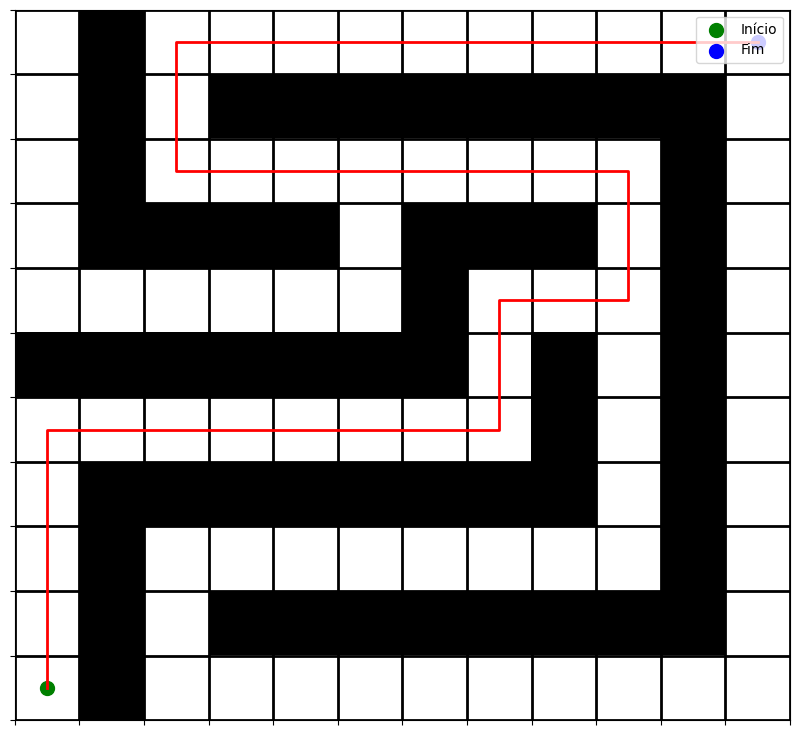

In [9]:
# Importação das bibliotecas necessárias
from collections import deque
import matplotlib.pyplot as plt
import numpy as np

# Definição do labirinto como uma matriz (lista de listas), onde 0 representa um caminho livre e 1 representa um obstáculo
maze = [
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
]

# Coordenadas de início e fim no labirinto
start = (0, 0)
end = (10, 11)

# Função para verificar se uma posição é válida para movimento no labirinto
def is_valid(maze, visited, row, col):
    """
    Verifica se a posição é válida.

    Parâmetros:
    maze (list): A matriz representando o labirinto.
    visited (list): A matriz que indica as posições já visitadas.
    row (int): Índice da linha da posição.
    col (int): Índice da coluna da posição.

    Retorna:
    bool: True se a posição for válida, False caso contrário.
    """
    rows = len(maze)
    cols = len(maze[0])
    return (0 <= row < rows) and (0 <= col < cols) \
           and not visited[row][col] and maze[row][col] == 0

# Função para realizar a busca em profundidade (DFS) no labirinto
def dfs(maze, start, end):
    """
    Realiza a busca em profundidade (DFS) para encontrar um caminho no labirinto.

    Parâmetros:
    maze (list): A matriz representando o labirinto.
    start (tuple): Coordenadas de início.
    end (tuple): Coordenadas do destino.

    Retorna:
    list: O caminho encontrado do início ao fim, ou None se não houver caminho.
    """
    stack = deque()
    stack.append((start, [start]))  # Inicializa a pilha com a posição inicial e o caminho até ela
    visited = [[False]*len(maze[0]) for _ in maze]  # Cria uma matriz de visitados

    while stack:
        (row, col), path = stack.pop()  # Desempilha o próximo nó a ser explorado
        if (row, col) == end:
            return path  # Retorna o caminho se o destino for alcançado

        visited[row][col] = True  # Marca a posição atual como visitada

        # Define as quatro direções possíveis de movimento: cima, baixo, esquerda, direita
        directions = [(-1,0), (1,0), (0,-1), (0,1)]
        for dr, dc in directions:
            new_row, new_col = row + dr, col + dc
            if is_valid(maze, visited, new_row, new_col):
                stack.append(((new_row, new_col), path + [(new_row, new_col)]))  # Adiciona a nova posição na pilha

    return None  # Retorna None se nenhum caminho for encontrado

# Função para plotar o labirinto e o caminho encontrado
def plot_maze(maze, path=None):
    """
    Plota o labirinto e o caminho encontrado, se houver.

    Parâmetros:
    maze (list): A matriz representando o labirinto.
    path (list): O caminho encontrado, se houver.
    """
    maze_array = np.array(maze)  # Converte o labirinto em um array do NumPy
    rows, cols = maze_array.shape

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(maze_array, cmap=plt.cm.binary)  # Plota o labirinto como uma imagem em preto e branco

    # Configuração do grid para visualização das células
    ax.set_xticks(np.arange(-0.5, cols, 1))
    ax.set_yticks(np.arange(-0.5, rows, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True, which='both', color='black', linewidth=2)

    # Plota o caminho encontrado, se houver
    if path:
        y_coords, x_coords = zip(*path)
        ax.plot(x_coords, y_coords, color='red', linewidth=2)

    # Marca o ponto de início e fim no labirinto
    ax.scatter(start[1], start[0], marker='o', color='green', s=100, label='Início')
    ax.scatter(end[1], end[0], marker='o', color='blue', s=100, label='Fim')
    ax.legend(loc='upper right')

    plt.gca().invert_yaxis()  # Inverte o eixo y para que a origem fique no topo
    plt.show()

# Executa a busca no labirinto e plota o resultado
path = dfs(maze, start, end)

if path:
    print("Caminho encontrado:")
    for step in path:
        print(step)
    plot_maze(maze, path)
else:
    print("Nenhum caminho encontrado.")
    plot_maze(maze)
